# Solving Wine Quality classification problem with deep neural networks and tf.Keras

## 1. Import libraries 

In [ ]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## 2. Load data

In [ ]:
ATT_FILE = "/gdrive/My Drive/Colab Notebooks/datasets/WineQuality/WineQualityPreparedCleanAttributes.csv"
LABEL_FILE = "/gdrive/My Drive/Colab Notebooks/datasets/WineQuality/WineQualityOneHotEncodedClasses.csv"

TRAIN_RATE=0.8

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

x_train: (3918, 11)
t_train: (3918, 3)
x_dev: (490, 11)
t_dev: (490, 3)


## 3. Initialize variables

In [ ]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

Some data is displayed to test correctness:

In [ ]:
x_train[:5]

array([[-1.63636364e-01, -7.22222222e-01, -2.00000000e-01,
         1.96078431e-01, -4.97630332e-01, -7.34375000e-01,
         2.29508197e-02,  4.25601040e-01, -6.07843137e-01,
        -2.30769231e-01, -6.77419355e-01],
       [-3.09090909e-01, -5.00000000e-01,  3.06666667e-01,
        -4.31372549e-01, -7.34597156e-01, -4.53125000e-01,
        -4.26229508e-02,  7.73229370e-02,  1.37254902e-01,
        -2.05128205e-01, -4.51612903e-01],
       [-1.81818182e-02, -7.77777778e-01, -3.06666667e-01,
        -3.62745098e-01, -5.73459716e-01, -3.90625000e-01,
         3.70491803e-01,  2.33268356e-01,  1.37254902e-01,
        -1.53846154e-01, -3.22580645e-01],
       [ 2.36363636e-01, -7.50000000e-01, -1.46666667e-01,
        -9.01960784e-01, -5.82938389e-01, -2.96875000e-01,
        -1.14754098e-01, -6.49772580e-04, -3.92156863e-02,
         3.84615385e-01, -4.83870968e-01],
       [-1.81818182e-02, -6.38888889e-01, -1.20000000e-01,
        -7.64705882e-01, -7.44075829e-01, -4.84375000e-01,
  

In [ ]:
t_train[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
x_dev[:5]

array([[ 0.30909091, -0.66666667, -0.25333333, -0.97058824, -0.86729858,
        -0.265625  , -0.52786885, -0.54385965, -0.76470588, -0.64102564,
         0.        ],
       [ 0.2       , -0.75      ,  0.33333333, -0.93137255, -0.65876777,
        -0.484375  , -0.18032787, -0.57244964, -0.29411765, -0.53846154,
         0.29032258],
       [-0.12727273, -0.30555556, -0.17333333, -0.64705882, -0.70616114,
        -0.703125  , -0.48852459, -0.67641326, -0.25490196, -0.33333333,
         0.74193548],
       [-0.34545455, -0.5       , -0.44      , -0.66666667, -0.80094787,
        -0.65625   , -0.27868852, -0.42949968, -0.49019608, -0.69230769,
        -0.12903226],
       [-0.23636364, -0.52777778, -0.2       , -0.90196078, -0.6492891 ,
        -0.53125   , -0.21967213, -0.2345679 ,  0.21568627, -0.25641026,
        -0.32258065]])

In [ ]:
t_dev[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 4. Set hyperparameters

In [ ]:
n_epochs =8000 
learning_rate = 0.001 
batch_size =250 
n_neurons_per_hlayer = [500, 250, 75, 25] # nº de neuronas por capa, 5 capas ocultas

## 5. Build the model: a 11-500-250-75-25-3 full-connected deep neural network architecture

First, the topology: sequential.

In [ ]:
#model = keras.Sequential(name="DeepFeedforward")
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None),
keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
keras.layers.Dropout(rate=0.8),
keras.layers.BatchNormalization(),
keras.layers.Dense(250, activation="relu", kernel_initializer="he_normal"),
keras.layers.Dropout(rate=0.4),
keras.layers.BatchNormalization(),
keras.layers.Dense(75, activation="relu", kernel_initializer="he_normal"),
keras.layers.Dropout(rate=0.2),
keras.layers.BatchNormalization(),
keras.layers.Dense(25, activation="relu", kernel_initializer="he_normal"),
keras.layers.Dropout(rate=0.1),
keras.layers.BatchNormalization(),
keras.layers.Dense(3, activation="softmax")])

Define the deep neural network topology. The **ReLU** activation function is chosen for the hidden layers and **softmax** for the output layer. 

Adding layers to the model. First, the model takes as input arrays with *INPUTS* columns. *InputLayer* creates a placeholder where the data is ready to feed the network. Then, the hidden layers with 500, 250, 75, and 25 neurons and the *ReLU* activation function are created. Finally, the output layer with the *softmax* activation function is appended. 

In [ ]:
#model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

#SANDRA HE COMENTADO ESTO PARA PROBAR EL DROPOUT
#for neurons in n_neurons_per_hlayer:
 # model.add(keras.layers.Dense(neurons, activation="relu",
 # kernel_regularizer=keras.regularizers.L2(0.001))) #IMPORTANTE! AÑADO REGULARIZADOR 
  #A VER SI BAJO LA VARINZA

#model.add(keras.layers.Dense(OUTPUTS, activation="softmax",
#kernel_regularizer=keras.regularizers.l2(0.001))) #aqui también hay q introducirlo
#model.summary()

For example, the last layer's kernel comprises 78 parameters to adjust: 25 neurons in the previous layer by 3 neurons in the output layer plus the 3 biases, one for each output neuron => ( 25 * 3 ) + 3 = 78

In [ ]:
model.layers

In [ ]:
for l in model.layers: print (l.name)

dense
dropout
batch_normalization
dense_1
dropout_1
batch_normalization_1
dense_2
dropout_2
batch_normalization_2
dense_3
dropout_3
batch_normalization_3
dense_4


All the parameters of a layer can bee accessed:

In [ ]:
weights, biases = model.layers[0].get_weights()
weights.shape

(11, 500)

In [ ]:
weights

array([[ 0.02939448, -0.15443148, -0.47977096, ..., -0.27768296,
        -0.42377657, -0.3419303 ],
       [ 0.07882968, -0.04293902,  0.14808619, ...,  0.10392908,
         0.3547861 ,  0.34704718],
       [ 0.00434386,  0.28074056, -0.48296955, ...,  0.6618088 ,
        -0.33509868,  0.68582845],
       ...,
       [-0.33916926,  0.4885697 ,  0.18916275, ...,  0.15960778,
        -0.3472652 ,  0.05051234],
       [ 0.05444647, -0.11117978,  0.42848513, ..., -0.16510493,
         0.03115004,  0.13544627],
       [ 0.12460811,  0.03064804,  0.6517888 , ..., -0.21542758,
        -0.08129884, -0.06021046]], dtype=float32)

In [ ]:
biases # Bias de la primera capa: 500 bias inicializados a 0 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(500,)

## 6. Compile the model

Compiling the model means specifying the *loss* function (the $log-loss$,  $cross-entropy$, the sum of log-loss is a loss) and the *optimizer* (Gradient Descent) to use. Optionally, you can also set a list of additional *metrics* (Accuracy) to compute during training and evaluation. 

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999),
              metrics=["categorical_accuracy"])


There are several loss functions, optimizers, and metrics. Full lists are available at: https://keras.io/losses/, https://keras.io/optimizers/ and https://keras.io/metrics/.


## 7. Train the model with M-BGD

Note that an **epoch** is an iteration over the entire training dataset.

In [ ]:
import time
start = time.clock()
history = model.fit(x_train, t_train, batch_size=batch_size, epochs=n_epochs, verbose=0, validation_data=(x_dev, t_dev))    
print (time.clock() - start)

831.094683


## 8. Get the results

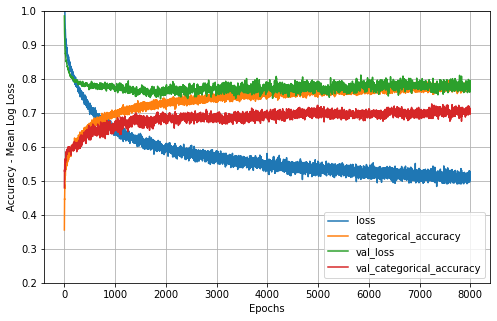

In [ ]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0.2, 1) # set the vertical range to [0-1]
plt.show()


# Overfitting in both: error and accuracy

In [ ]:
history.params

{'epochs': 8000, 'steps': 16, 'verbose': 0}

In [ ]:
results[-1:] # Accuracy de 71%

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
7999,0.511687,0.776927,0.783756,0.706122


In [ ]:
print ("Accuracy for the training set: ", results.categorical_accuracy.values[-1:][0])

Accuracy for the training set:  0.7769269943237305


In [ ]:
print ("Accuracy for the development test set: ", results.val_categorical_accuracy.values[-1:][0])

Accuracy for the development test set:  0.7061224579811096


Now the accuracy is 83% on training and 77% on the development test set 

Let's see how the model predicts using the development test set:

In [ ]:
dev_predictions=model.predict(x_dev).round(2) 
dev_predictions[:20]

array([[0.3 , 0.69, 0.  ],
       [0.01, 0.86, 0.14],
       [0.02, 0.42, 0.56],
       [0.14, 0.86, 0.  ],
       [0.03, 0.36, 0.61],
       [0.13, 0.75, 0.12],
       [0.94, 0.06, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.01, 0.9 , 0.09],
       [0.08, 0.81, 0.1 ],
       [0.01, 0.87, 0.12],
       [0.17, 0.35, 0.48],
       [0.8 , 0.2 , 0.  ],
       [0.02, 0.96, 0.02],
       [0.  , 0.16, 0.83],
       [0.41, 0.59, 0.  ],
       [0.13, 0.87, 0.01],
       [0.99, 0.01, 0.  ],
       [0.01, 0.75, 0.24],
       [0.86, 0.14, 0.  ]], dtype=float32)

In [ ]:
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
t_dev[:20] #target classes

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(t_dev,1))
print (dev_correct_predictions[:30])

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True False False  True  True
  True  True False  True False  True]


In [ ]:
from collections import Counter
Counter (dev_correct_predictions)

Counter({False: 145, True: 345})

## 9. Save model


We save the model if it is better than others 

In [ ]:
# Save
model.save('my_model5.h5') # Change the name in each model

In [ ]:
# Extract
#new_model = keras.models.load_model('path_to_my_model3.h5')

In [ ]:
import numpy as np

# Verify state
new_predictions = new_model.predict(x_test)
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)

# Note that the optimizer state is also preserved:
# you can resume training where you left off.

NameError: ignored

## 10. Final Test

### 10.1 Load the final test set

In [ ]:
n_final_test = n_instances-n_train-n_dev

x_final_test = attributes.values[n_train+n_dev:n_instances]
t_final_test = label.values[n_train+n_dev:n_instances]

print ("x_test:",x_final_test.shape)
print ("t_test:",t_final_test.shape)

### 10.2 Evaluate the model

In [ ]:
#model.evaluate(x_final_test, t_final_test) # Un 77 es un accuracy bajo 

77% accuracy on the final test set

The outputs computed by the neural network for the final testing dataset. 

In [ ]:
#test_predictions=model.predict(x_final_test)
#test_rounded_predictions=np.round(test_predictions)
#indices = np.argmax(test_predictions,1)
#for row, index in zip(test_rounded_predictions, indices): row[index]=1
#test_rounded_predictions[:20]

The target outputs.

In [ ]:
t_final_test[:20]

The first 30 predictions. True means that the neural network correctly classifies the input vector.  

In [ ]:
#test_correct_predictions = np.equal(np.argmax(test_rounded_predictions,1),np.argmax(t_final_test,1))
#test_correct_predictions[:30]

**The final test accuracy.**

In [ ]:
#from collections import Counter
#final_test_prediction_results=Counter(test_correct_predictions)
#final_test_prediction_results

In [ ]:
#final_test_prediction_results[True]/sum(final_test_prediction_results.values())